In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import time

//Users/jonathanbouchet/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def clean(data):
    data["Age"] = data["Age"].fillna(data["Age"].mean())
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    return data

In [3]:
# get titanic & test csv files as a DataFrame
data = pd.read_csv("./train.csv", dtype={"Age": np.float64}, )
data = clean(data)
predictors = ["Pclass","Sex","Age","Embarked","SibSp"]
X = data[predictors]
y = data['Survived']
X_train, X_test, y_train,y_test = train_test_split(X,y)

In [4]:
start_time = time.time()
logReg = LogisticRegression()
print logReg
logReg.fit(X_train, y_train)
print "Total time took %f seconds" % (time.time()-start_time)
y_pred = logReg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Total time took 0.204375 seconds
0.789237668161


In [5]:
prediction_log = logReg.predict_proba(X_test)
y_pred_log = prediction_log[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log,tpr_log)

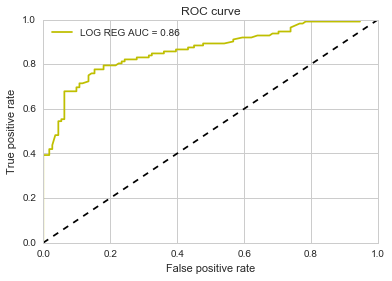

In [6]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, 'y',label = 'LOG REG AUC = %0.2f' % roc_auc_log)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

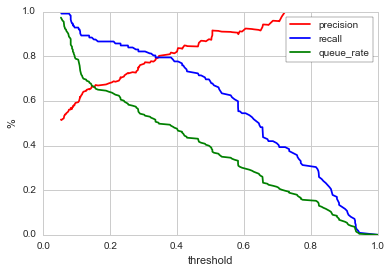

In [7]:
from sklearn.metrics import precision_recall_curve
predictions = logReg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, predictions) 
thresholds = np.append(thresholds, 1)

queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((predictions >= threshold).mean()) 
    
plt.plot(thresholds, precision, color='red') 
plt.plot(thresholds, recall, color='blue') 
plt.plot(thresholds, queue_rate, color='green') 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')